**Semana 5 - MODULO 2: Data Analysis with Python (IBM)**

Nombre: Diego Alonso Luna Ramirez

Matricula: A01793035

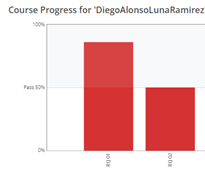

In [ ]:
import requests
import os
import pandas as pd
import numpy as np
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
path=os.path.join(os.getcwd(),'cars.csv')
df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df.to_csv(path)

In [ ]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df=pd.read_csv(url, header= None)
headers=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.columns = headers
df=df.replace('?',np.NaN)
df2=df.copy()
# Access values by column
print(df2["symboling"].head(3))
# Add 1 to whole columns
df2["symboling"]=df2["symboling"]+1
print(df2["symboling"].head(3))

0    3
1    3
2    1
Name: symboling, dtype: int64
0    4
1    4
2    2
Name: symboling, dtype: int64


Solicitud para obtener el valor que falta.

Elimina los valores perdidos. (no recomendado cuando los datos son limitados).

Soltar entrada -
Soltar variable

Reemplazar valores faltantes (menos precisos),
Reemplazar con promedio (no categórico),
Reemplazar con la mediana (categórica),
Reemplazar con otras funciones,
Dejar datos faltantes.

subset = columna/fila
axis = 1 = columna o eje = 0 = filas
inplace = True usa el mismo marco de datos o False establece en un nuevo marco de datos

**Cuente los valores faltantes en cada columna**

In [ ]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Según el resumen anterior, cada columna tiene 205 filas de datos y siete de las columnas contienen datos faltantes:

"normalized-losses": 41 datos faltantes
"num-of-doors": 2 datos faltantes
"bore": 4 datos faltantes
"stroke" : 4 datos faltantes
"horsepower": 2 datos faltantes
"peak-rpm": 2 datos faltantes
"price": 4 datos faltantes

*Las columnas completas deben eliminarse solo si la mayoría de las entradas de la columna están vacías. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para descartarla por completo. Tenemos cierta libertad para elegir qué método reemplazar los datos; sin embargo, algunos métodos pueden parecer más razonables que otros. Aplicaremos cada método a muchas columnas diferentes.*

**Reemplazar por media:**

"normalized-losses"
"stroke"
"bore"
"horsepower"
"peak-rpm"

**Reemplazar por frecuencia:**

"num-of-doors"

**Suelta toda la fila:**

"price"

**Calcule el valor medio de la columna "pérdidas normalizadas"**

In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


Reemplace "NaN" con el valor medio en la columna "pérdidas normalizadas"

In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Calcule el valor medio para la columna "bore"

In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


Reemplace "NaN" con el valor medio en la columna "bore"

In [ ]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [ ]:
# Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Average of stroke: 3.255422885572139


In [ ]:
#Calculate the mean value for the "horsepower" column
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [ ]:
#Replace "NaN" with the mean value in the "horsepower" column
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [ ]:
#Calculate the mean value for "peak-rpm" column
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [ ]:
#Replace "NaN" with the mean value in the "peak-rpm" column
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Ahora eliminemos todas las filas que no tienen datos de precios:

In [ ]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Ahora tenemos un dataset sin valores faltantes.**

###**Formato de datos correcto**

In [ ]:
# Identify data types
print(df.dtypes)
# Adjust types by column
df["price"] = df["price"].astype("float")
df["normalized-losses"] = df["normalized-losses"].astype("float")
df["make"] = df["make"].astype("string")
df["fuel-type"] = df["fuel-type"].astype("string")
df["aspiration"] = df["aspiration"].astype("string")
df["num-of-doors"] = df["num-of-doors"].astype("string")
df["body-style"] = df["body-style"].astype("string")
df["drive-wheels"] = df["drive-wheels"].astype("string")
df["engine-location"] = df["engine-location"].astype("string")
df["engine-type"] = df["engine-type"].astype("string")
df["fuel-system"] = df["fuel-system"].astype("string")
df["num-of-cylinders"] = df["num-of-cylinders"].astype("string")
df["bore"] = df["bore"].astype("float")
df["stroke"] = df["stroke"].astype("float")
df["horsepower"] = df["horsepower"].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
symboling              int64
normalized-losses    float64
make                  string
fuel-type             string
aspiration            string
num-of-doors          string
body-style            string
drive-wheels          string


**Estandarización de datos**

Los datos generalmente se recopilan de diferentes agencias en diferentes formatos. (La estandarización de datos también es un término para un tipo particular de normalización de datos donde restamos la media y dividimos por la desviación estándar).

La estandarización es el proceso de transformar los datos en un formato común, lo que permite al investigador hacer una comparación significativa.

In [ ]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556


In [ ]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556


**Normalización de datos**

La normalización es el proceso de transformar valores de varias variables en un rango similar. Las normalizaciones típicas incluyen escalar la variable para que el promedio de la variable sea 0, escalar la variable para que la varianza sea 1 o escalar la variable para que los valores de la variable oscilen entre 0 y 1.

In [ ]:
# Data normalization

# Arrange the range of values to ajust importance
df5=df.copy()

# Simple Feature Scaling ( Xnew = Xold / Xmax )
df5["length-SFS"]=df["length"]/df["length"].max()
# Min-Max ( Xnew = (Xold - Xmin) / (Xmax - Xmin ))
df5["length-MM"]=(df["length"]-df["length"].min())/(df["length"].max()-df["length"].min())
# Z-score ( Xnew = (Xold - mean of feature ) / standar deviation )
df5["length-Z"]=(df["length"]-df["length"].mean())/df["length"].std()
print(df5[["length","length-SFS","length-MM","length-Z"]].head(3))

   length  length-SFS  length-MM  length-Z
0   168.8    0.811148   0.413433 -0.438315
1   168.8    0.811148   0.413433 -0.438315
2   171.2    0.822681   0.449254 -0.243544


**Binning Data In Pandas**

Es un proceso de transformación de variables numéricas continuas en "contenedores" categóricos discretos para el análisis agrupado.

In [ ]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

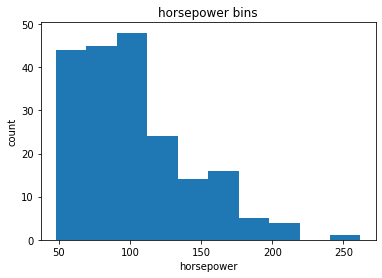

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

,price,price-binned
0,13495.0,Low
1,16500.0,Low
2,16500.0,Low
3,13950.0,Low
4,17450.0,Low
...,...,...
196,16845.0,Low
197,19045.0,Medium
198,21485.0,Medium
199,22470.0,Medium


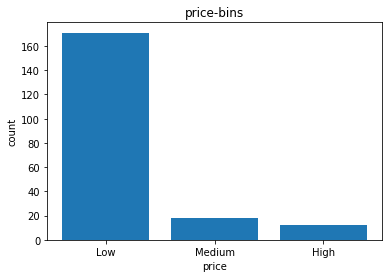

In [ ]:
# Binning
import matplotlib as plt
from matplotlib import pyplot

# Group values in Bins 
# Can be for categorical or non categorical
df6=df.copy()

# Separate into 3 categories the min and max values of a column
bins = np.linspace(min(df["price"]),max(df["price"]),4)

# Create the Names of the categories
group_names = ["Low","Medium","High"]

# Separete de column into categories using cut
df["price-binned"]=pd.cut(df["price"],bins,labels=group_names, include_lowest=True)

pyplot.bar(group_names, df["price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price-bins")

df[["price","price-binned"]]

In [ ]:
# Use categorical values
# One hot Encoding
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [ ]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
